<a href="https://colab.research.google.com/github/naoki-yoshi/Task/blob/master/task9%E5%AF%8C%E5%A3%AB%E4%B8%8B%E5%B1%B1%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 富士下山問題

勾配降下法は山や谷を下ることに例えられます。富士山の標高データを **最小化したい目的関数** に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
# x・lat・lng・elevation・distance
print("標高データセットの一部を表示\n{}".format(fuji[130:140]))

標高データセットの一部を表示
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### 【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。

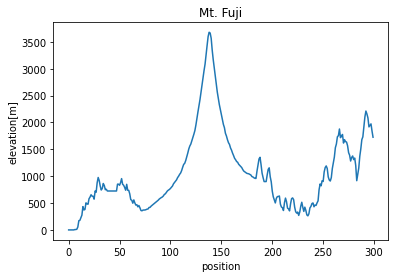

In [4]:
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3]) # その地点の番号は0からの連番なので省略も可能（しかし、番号が異なる場合もありえるので解答例としては明示）
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成

「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

[![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)](https://diveintocode.gyazo.com/7fd04c4808b8a0150a49c908e21f3cd2)

#### （解説）

勾配を求める式をコードに落とし込みます。

xの変化量（地点の番号の差）は常に1になるため、省略することが可能です。ただし、番号が常に連番ではないことを想定し、書いておいても良いでしょう。

In [5]:
def compute_gradient(position, elevations):
    """
    今いる地点の勾配を計算する。

    Parameters
    ----------------
    position : int
    今いる地点の番号
    elevations : ndarray, shape(n,)
    標高

    Returns
    ----------------
    gradient : numpy.float
    今いる地点の勾配
    """
    return elevations[position] - elevations[position-1]

In [6]:
position = 136
fuji_elevations = fuji[:, 3]

print("{}番地点の勾配：{}".format(position, compute_gradient(position, fuji_elevations)))

136番地点の勾配：168.35000000000036


In [7]:
# 同じ関数のまま、引数にndarrayを渡すことで複数地点にも拡張できる

positions = np.array([135, 136, 137])
fuji_elevations = fuji[:, 3]

print("{}番地点の勾配：{}".format(positions, compute_gradient(positions, fuji_elevations)))

[135 136 137]番地点の勾配：[178.43 168.35 165.49]


### 【問題3】移動先の地点を計算する関数を作成




In [8]:
def compute_next_position(position, elevations, alpha=0.1):
    """
    次に移動する地点を計算する。

    Parameters
    ----------------
    position : int
    今いる地点の番号
    elevations : ndarray, shape(n,)
    標高
    alpha : float or int
    どれだけ移動するかに関わるハイパーパラメータ

    Returns
    ----------------
    next_position_int : numpy.int
    次に移動する地点
    """
    next_position = position - alpha*compute_gradient(position, elevations)
    next_position = np.maximum(1, next_position) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    next_position = np.minimum(len(elevations)-1, next_position) # 範囲より大きい値を範囲内に収める
    next_position_int = np.round(next_position).astype(int)
    return next_position_int

In [9]:
position = 136
fuji_elevations = fuji[:, 3]

next_position = compute_next_position(position , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(position, next_position))

136番地点の次に移動する地点：119


In [10]:
# 同じ関数のまま、引数にndarrayを渡すことで複数地点にも拡張できる

positions = np.array([135, 136, 137])
fuji_elevations = fuji[:, 3]

next_positions = compute_next_position(positions , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(positions, next_positions))

[135 136 137]番地点の次に移動する地点：[117 119 120]


### 【問題4】山を下る関数を作成



In [11]:
def descend_mountain(start_position, elevations, alpha=0.1):
    """
    山を下る過程を計算する。

    Parameters
    ----------------
    start_position : int
    最初の地点の番号
    elevations : ndarray, shape(n,)
    標高
    alpha : float or int
    どれだけ移動するかに関わるハイパーパラメータ

    Returns
    ----------------
    list of int
    山を下る過程で通る地点の番号のリスト
    """
    positions = [start_position]
    while positions[-1] not in positions[:-1]:
        positions.append(compute_next_position(positions[-1], elevations, alpha=alpha))
    return positions[:-1]

In [12]:
start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mountain(start_position, fuji_elevations, alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(descended_list))

山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


### 【問題5】下山過程の可視化



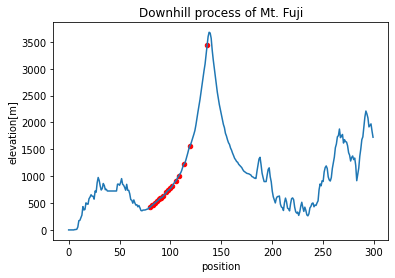

In [15]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 断面図の中に移動した地点を点で表示する
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()

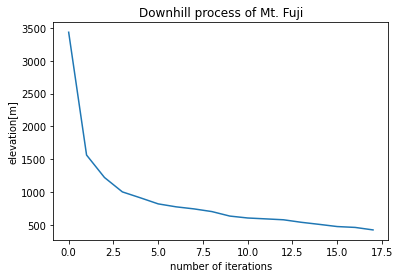

In [16]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 繰り返し毎の標高を折れ線グラフにする
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('number of iterations')
plt.plot(descended_elevations)
plt.show()

### 【問題6】初期値の変更



In [17]:
descended_lists = []
for i, start_position in enumerate(range(1, 300)):
    descended_lists.append(descend_mountain(start_position, fuji[:, 3], alpha=0.2))
print("作成したリストの種類：{}".format(len(descended_lists))) #299通り計算できたことを確認

作成したリストの種類：299


##【問題7】可視化

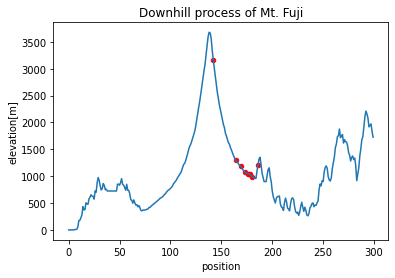

In [18]:
# 逆側を降りる様子を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[141], fuji[:, 3][descended_lists[141]], 20, color='red')
plt.show()

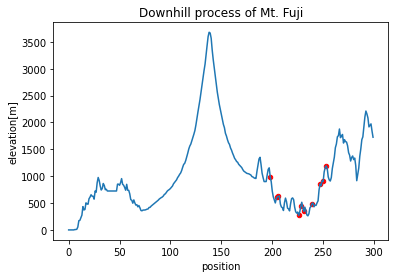

In [19]:
# さらに異なる位置を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[249], fuji[:, 3][descended_lists[249]], 20, color='red')
plt.show()

### 【問題8】（アドバンス問題）ハイパーパラメータの変更



In [20]:
start_position = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])

descended_lists_alphas = []
for i, alpha in enumerate(alphas):
    descended_lists_alphas.append(descend_mountain(start_position, fuji[:, 3], alpha=alpha))
print("作成したリストの種類：{}".format(len(descended_lists_alphas)))

作成したリストの種類：6


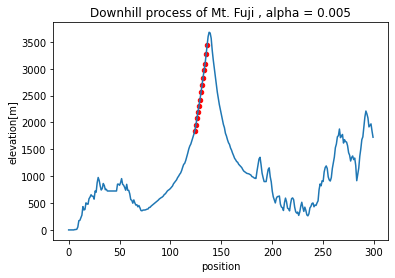

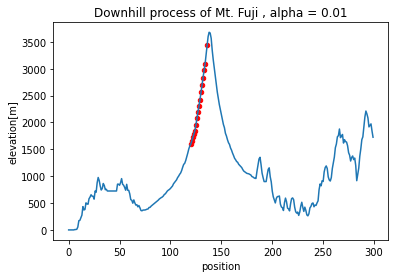

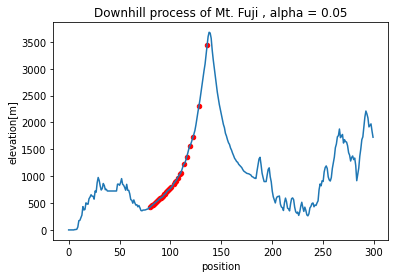

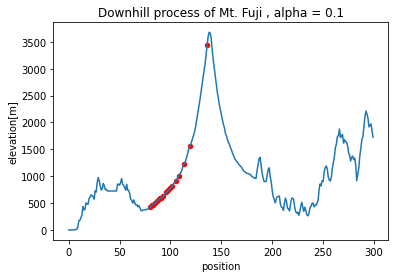

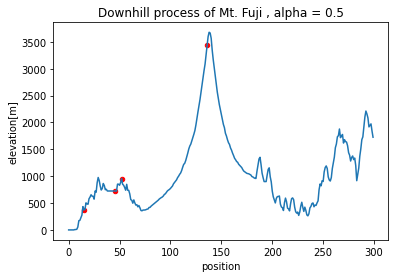

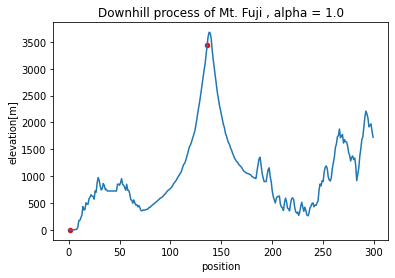

In [21]:
for i, alpha in enumerate(alphas):
    plt.title('Downhill process of Mt. Fuji , alpha = {}'.format(alpha))
    plt.ylabel('elevation[m]')
    plt.xlabel('position')
    plt.plot(fuji[:, 3])
    plt.scatter(descended_lists_alphas[i], fuji[:, 3][descended_lists_alphas[i]], 20, color='red')
    plt.show()

In [22]:
start_position = 152
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])

descended_lists_alphas = []
for i, alpha in enumerate(alphas):
    descended_lists_alphas.append(descend_mountain(start_position, fuji[:, 3], alpha=alpha))
print("作成したリストの種類：{}".format(len(descended_lists_alphas)))

作成したリストの種類：6


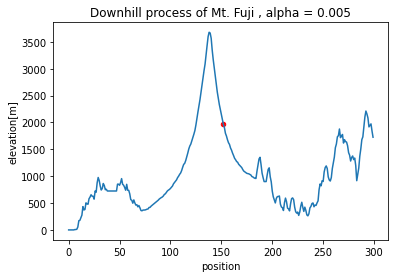

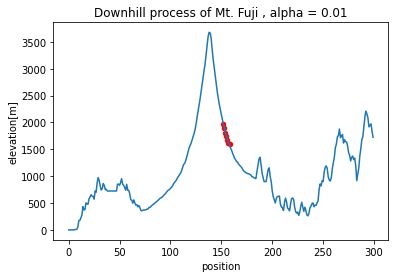

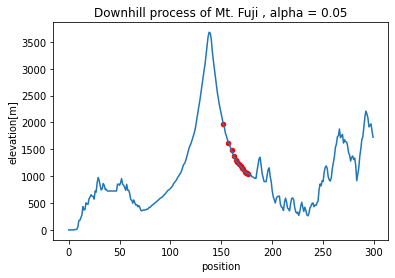

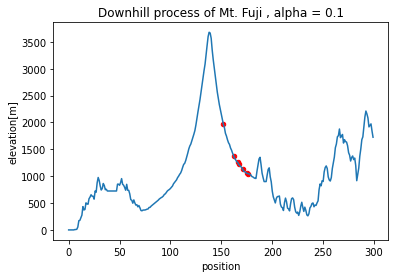

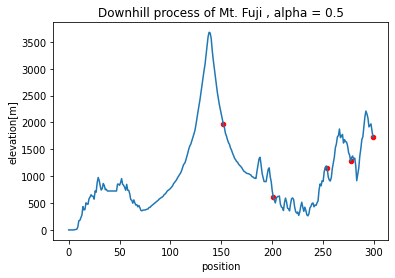

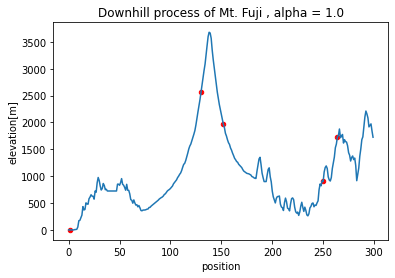

In [23]:
for i, alpha in enumerate(alphas):
    plt.title('Downhill process of Mt. Fuji , alpha = {}'.format(alpha))
    plt.ylabel('elevation[m]')
    plt.xlabel('position')
    plt.plot(fuji[:, 3])
    plt.scatter(descended_lists_alphas[i], fuji[:, 3][descended_lists_alphas[i]], 20, color='red')
    plt.show()